 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            4
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:            850
 Number of total equations: -          850
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.62769E-32  7.32920E+01
    1  4.62769E-32  7.32920E+01
 Successful s

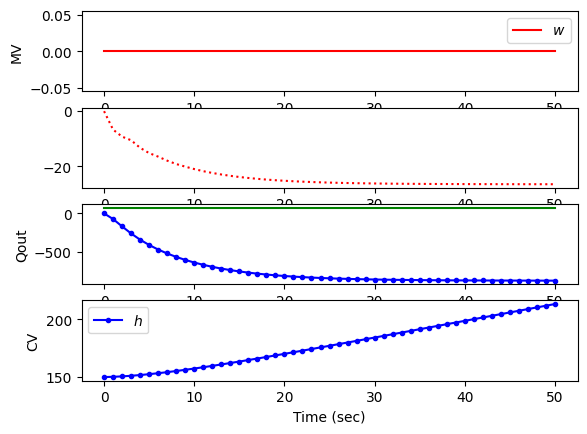

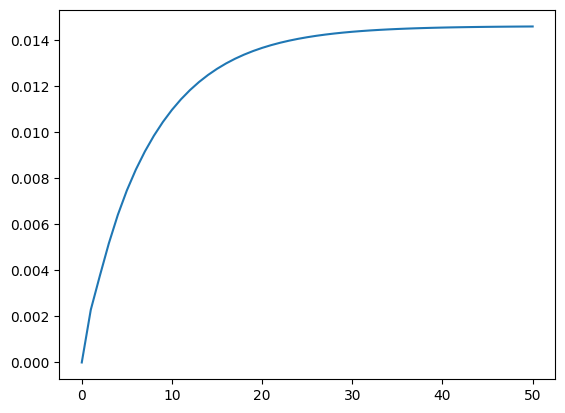

In [36]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO(remote=False)
w = m.MV()
w.STATUS = 1 # Allows to be changed
Qout = m.CV()
P = m.CV()
h = m.CV(value=150)

h.STATUS = 1 # Add to Objective
m.options.CV_TYPE = 2
h.SP = 180


A_power = np.array([[3.7971E-01],\
                    [5.1151E-02],\
                    [3.1656E-01]])
A_outflow = np.array([[1.2995],\
                    [-4.3918E-01],\
                    [4.5231E-02],\
                    [0],\
                    [1.0387E-02]])

# B (ny x (nb x nu))
B_power = np.array([[[5.5404E-02],[-1.4118E-02],[-2.3452E-02]]]).T
B_outflow = np.array([[[7.1049E-02],[4.1327E-02],[6.4801E-02],[0],[-6.6199E-02]]]).T

C_power = np.array([-6.6831])
C_outflow = np.array([-7.3292E+01])

p_power = {'a':A_power,'b':B_power,'c':C_power}
p_outflow = {'a':A_outflow,'b':B_outflow,'c':C_outflow}

m.arx(p_power,P,w)
m.arx(p_outflow,Qout,w)

# Create local GEKKO model


# load inputs
tf = 50 # final time
u1 = np.zeros(tf+1)
u1[5:] = 1000
#w.value = u1

m.Equation(h.dt() == 1/18 *(75 - Qout)/3600*100)
dh = m.Var()
m.Equation(h.dt() == dh*100)

# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4
m.options.nodes = 2

# simulate
m.solve()

plt.figure(1)
plt.subplot(4,1,1)
plt.plot(m.time,w.value,'r-',label=r'$w$')
plt.ylabel('MV')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(m.time,P.value,'r:',label=r'$P$')
plt.subplot(4,1,3)
plt.plot(m.time,Qout.value,'b.-',label=r'$Qout$')
plt.plot(m.time,75*np.ones(tf+1),'g-',label=r'$Qin$')
plt.ylabel('Qout')
plt.subplot(4,1,4)
plt.plot(m.time,h.value,'b.-',label=r'$h$')
#plt.plot(m.time,d_cv1.value,'g.-',label=r'$v$')
#plt.plot(m.time,d_cv2.value,'g.-',label=r'$v$')
plt.ylabel('CV')
plt.xlabel('Time (sec)')
plt.legend(loc='best')
plt.show()
plt.plot(dh)
